In [37]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dataset2.csv')

In [38]:
%%HTML
<link rel='stylesheet' type='text/css' href='style.css'>

<p id='nome'>Antonio Di Carlo <p id='matricola'>Matricola 158459</p></p>
<br><br><br>
<h1 id='titolo'>Fattori di rischio e mortalità<br>negli Incidenti Stradali</h1>
<br><br><br>
<p id='sub'>Fondamenti di Scienza dei Dati e Laboratorio</p>

<h2>Introduzione e scelta del dataset</h2>
<br><br>
<ul>
    <li>Gli <b>incidenti stradali</b> rientrano tra le principali cause di <i>morte</i></li>
    <br>
    <li>I mezzi di trasporto sono fondamentali per la nostra <i>mobilità</i></li>
    <br>
    <li>Sensibilizzazione e consapevolezza dei <i>rischi</i></li>
</ul>

In [39]:
# Associazione entità ferita al relativo numero
mapping_entità_ferita = {
    0: 'Nessuna lesione', 
    1: 'Possibile lesione', 
    2: 'Lesione lieve', 
    3: 'Perdità capacità fisica', 
    4: 'Morte', 
    5: 'Sconosciuta', 
    6: 'Morte precedente'
}

df['entità_ferita'] = df['injSeverity'].map(mapping_entità_ferita)

# Esclusione casi di 'Morte precedente' (2 occorrenze rilevate nell'intero dataset)
df = df[df['entità_ferita'] != 'Morte precedente']

# Esclusione casi di 'Morte precedente' (133 casi rilevati nell'intero dataset, irrilevanti riguardo le analisi effettuate)
df = df[df['entità_ferita'] != 'Sconosciuta']

# Creazione ordinamenti entità ferita
ordinamento_entità_ferita = ['Morte', 'Perdità capacità fisica', 'Lesione lieve', 'Possibile lesione', 'Nessuna lesione']
ordinamento_entità_ferita2 = ['Nessuna lesione', 'Possibile lesione', 'Lesione lieve', 'Perdità capacità fisica', 'Morte']

# Sistemazione formattazione velocità
mapping_velocità = {
    '1-9km/h': '1-9 Km/h',
    '10-24': '10-24 Km/h',
    '25-39': '25-39 Km/h',
    '40-54': '40-54 Km/h',
    '55': '55+ Km/h'
}

df['velocità'] = df['dvcat'].map(mapping_velocità)

# Creazione ordinamenti velocità
ordinamento_velocità = ['1-9 Km/h', '10-24 Km/h', '25-39 Km/h', '40-54 Km/h', '55+ Km/h']

# Traduzione formattazione cintura
mapping_cintura = {
    'belted': 'Cintura allacciata', 
    'none': 'Cintura non allacciata'
}

df['cintura'] = df['seatbelt'].map(mapping_cintura)

# Creazione distinzione tra airbag aperto o non aperto(indipendentemente dalla disponibilità)
mapping_airbag_apertura = {
    'deploy': 'Aperto', 
    'nodeploy': 'Non aperto', 
    'unavail': 'Non aperto'
}

df['airbag_apertura'] = df['abcat'].map(mapping_airbag_apertura)

# Traduzione sopravvissuto/morto
mapping_sopravvissuto = {
    'alive': 'Sopravvissuto', 
    'dead': 'Morto'
}

df['sopravvissuto'] = df['dead'].map(mapping_sopravvissuto)

# Traduzione sesso
mapping_sesso = {
    'f': 'Donne', 
    'm': 'Uomini'
}

df['sesso'] = df['sex'].map(mapping_sesso)

<h2>Entità degli incidenti stradali</h2>

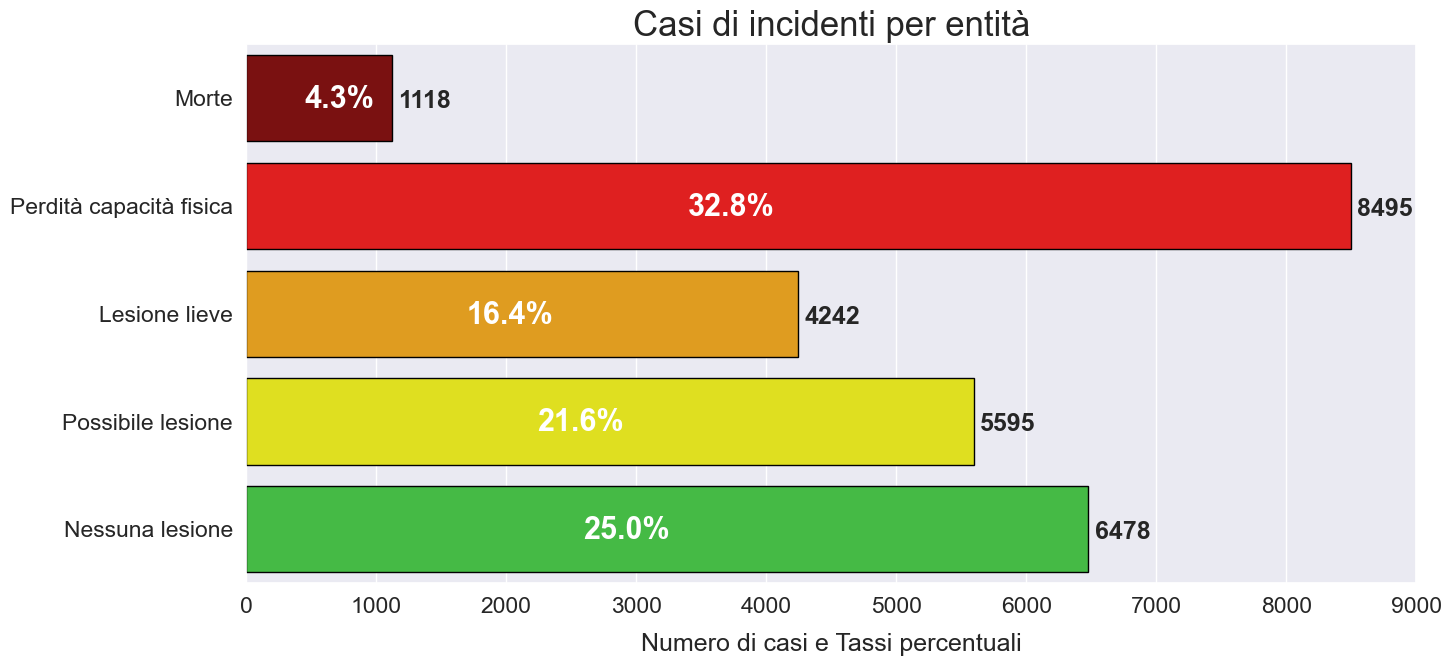

In [40]:
# Coinvolgimento in incidenti e conseguenze (panoramica complessiva sul dataset)
# Note: il dataset iniziale è stato aggiornato rimuovendo i casi di 'Morte precedente' i quali apparivano soltanto 2 volte

colori = {
    'Morte': 'darkred', 
    'Perdità capacità fisica': 'red', 
    'Lesione lieve': 'orange', 
    'Possibile lesione': 'yellow', 
    'Nessuna lesione': 'limegreen'
    #'Sconosciuta': 'gray'
}

# Grafico per conteggio e percentuali casi registrati in base all'entità

plt.figure(figsize=(12, 7))
ax = sns.countplot(df, y='entità_ferita', hue='entità_ferita', order=ordinamento_entità_ferita, palette=colori, lw=1, ec='black')

totale_casi = len(df)

for p in ax.patches:
    ax.annotate(int(p.get_width()),  (p.get_x() + p.get_width() + 50, p.get_y() + 0.49), weight='bold')
    percentuale = (p.get_width()) * 100 / totale_casi
    ax.annotate(f'{percentuale:.1f}%',  (p.get_x() + p.get_width() / 2.5, p.get_y() + 0.49), weight='bold', color='white', fontsize=22)
plt.title('Casi di incidenti per entità', fontsize=25)
plt.xlabel('Numero di casi e Tassi percentuali', labelpad=12)
plt.ylabel('', labelpad=12)
plt.subplots_adjust(right=1.1)
sns.set(font_scale=1.5)
ax.set_xlim([0,9000])
plt.show()

# Analizziamo i dati osservati nel precedente grafico basandoci sull'uso della cintura di sicurezza

# Prendiamo due sezioni del dataset:
# -Prima sezione(casi con utilizzo della cintura di sicurezza)
df_cintura = df[df['cintura'] == 'Cintura allacciata']
totale_casi_cintura = len(df_cintura)

# -Seconda sezione(casi senza utilizzo della cintura di sicurezza)
df_nocintura = df[df['cintura'] == 'Cintura non allacciata']
totale_casi_nocintura = len(df_nocintura)

# Osserviamo le percentuali che i due gruppi ottenuti rappresentano rispettano ai casi totali del dataset
#percentuale_casi_cintura = totale_casi_cintura * 100 / totale_casi
#percentuale_casi_nocintura = totale_casi_nocintura * 100 / totale_casi

#display(percentuale_casi_cintura)
#display(percentuale_casi_nocintura)

<h2>Uso della cintura di sicurezza</h2>

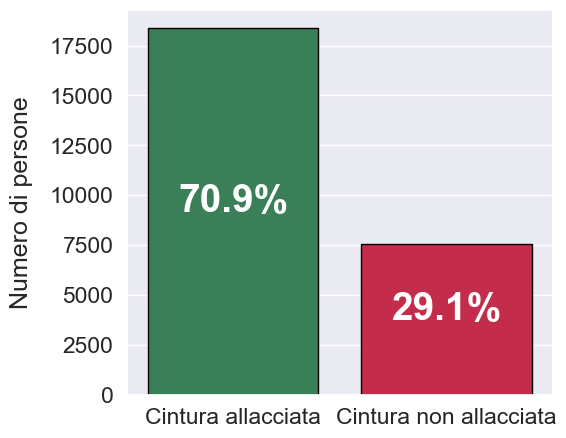

In [41]:
# Grafico percentuale uso cintura rispetto ai casi totali
colori_cintura = {
    'Cintura allacciata' : 'seagreen',
    'Cintura non allacciata' : 'crimson'
}
plt.figure(figsize=(5.5, 5))
ax = sns.countplot(df, x='cintura', hue='cintura', palette=colori_cintura, lw=1, ec='black')
for p in ax.patches:
    percentuale_uso_cintura = (p.get_height()) / totale_casi * 100
    ax.annotate(f'{percentuale_uso_cintura:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height() / 2), ha='center', fontsize=28, weight='bold', color='white')
#plt.title('Uso della cintura di sicurezza', fontsize=20)
plt.xlabel('')
plt.ylabel('Numero di persone', labelpad=12)
plt.show()

<h3>Ora che abbiamo distinto i due gruppi torniamo nel dettaglio...</h3>

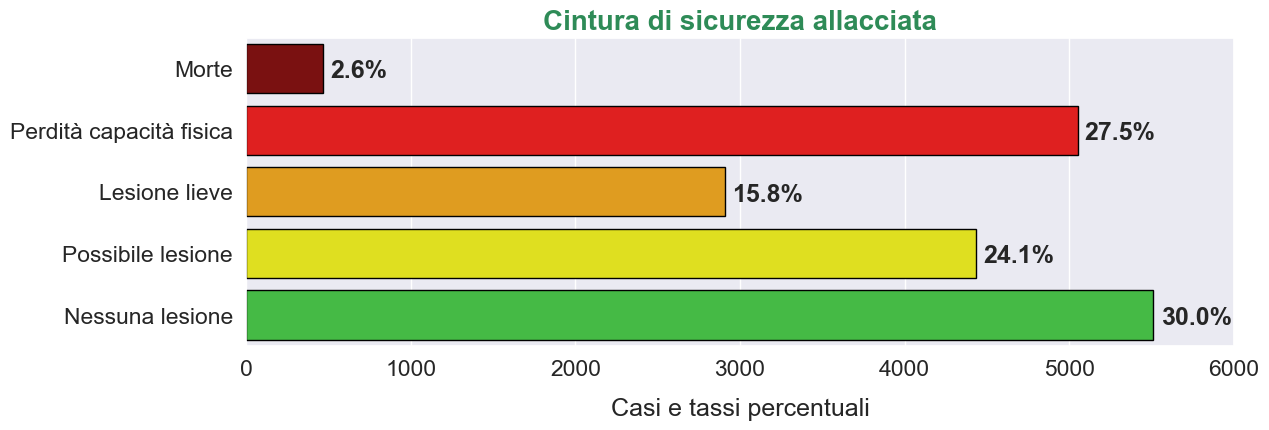

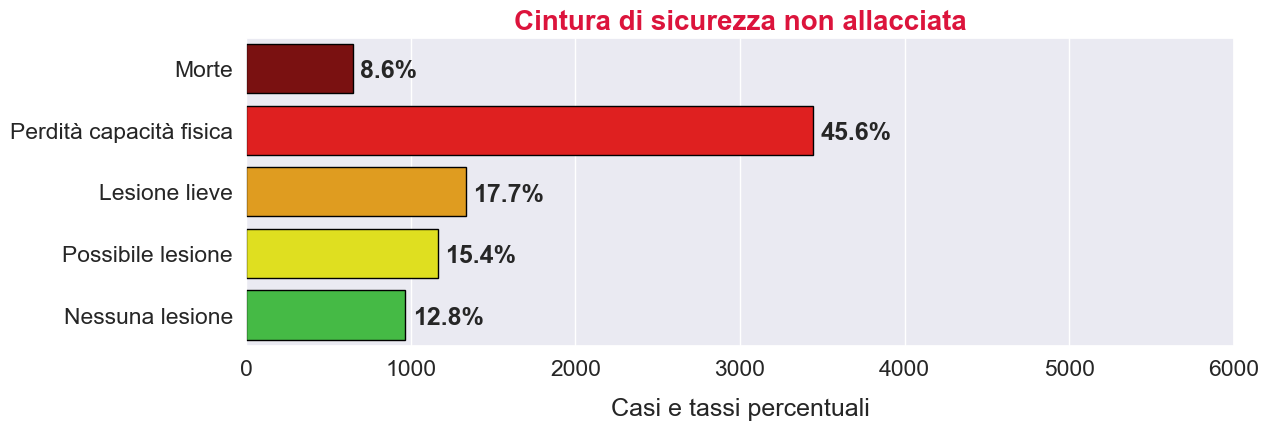

In [42]:
# Grafici dei due sottogruppi

# Gruppo 1(con cintura)
plt.figure(figsize=(5, 4))
ax = sns.countplot(df_cintura, y='entità_ferita', hue='entità_ferita', order=ordinamento_entità_ferita, palette=colori, lw=1, ec='black')

totale_casi_cintura = len(df_cintura)

for p in ax.patches:
    percentuale_cintura = (p.get_width()) * 100 / totale_casi_cintura
    ax.annotate(f'{percentuale_cintura:.1f}%',  (p.get_x() + p.get_width() + 45, p.get_y() + 0.55), weight='bold')
ax.set_title('Cintura di sicurezza allacciata', fontsize=20, color='seagreen', weight='bold')
plt.xlabel('Casi e tassi percentuali', labelpad=13)
plt.ylabel('', labelpad=12)
plt.subplots_adjust(right=2.1)
ax.set_xlim([0,6000])
plt.show()

# Gruppo 2(senza cintura)
plt.figure(figsize=(5, 4))
ax = sns.countplot(df_nocintura, y='entità_ferita', hue='entità_ferita', order=ordinamento_entità_ferita, palette=colori, lw=1, ec='black')

totale_casi_nocintura = len(df_nocintura)

for p in ax.patches:
    percentuale_nocintura = (p.get_width()) * 100 / totale_casi_nocintura
    ax.annotate(f'{percentuale_nocintura:.1f}%',  (p.get_x() + p.get_width() + 45, p.get_y() + 0.55), weight='bold')
ax.set_title('Cintura di sicurezza non allacciata', fontsize=20, color='crimson', weight='bold')
plt.xlabel('Casi e tassi percentuali', labelpad=13)
plt.ylabel('', labelpad=13)
plt.subplots_adjust(right=2.1)
ax.set_xlim([0,6000])
plt.show()

# Conclusioni
#Indossare la cintura di sicurezza riduce la probabilità di:

#-Morte di: 3.3 volte
riduzione_mortalità = 8.6 / 2.6
#display(riduzione_mortalità)

#-Perdita di capacità fisica di: 1.7 volte
riduzione_perdita_capacità = 45.6 / 27.5
#display(riduzione_perdita_capacità)

#Indossare la cintura di sicurezza aumenta la probabilità di:
#-Non riportare lesioni di: 2.3 volte
aumento_illesi = 30 / 12.8
#display(aumento_illesi)



<h2>Quindi abbiamo osservato che:</h2>
<br><br>
<h3><b class='nocintura'>Non allacciare</b> la cintura di sicurezza comporta...</h3>
<ul>
    <li>☠️Aumento del rischio di <b class='morte'>morte</b> di 3.3 volte</li>
    <li>🧑‍🦽Aumento del rischio di <b class='perdita'>perdita di capacità fisica</b> di 1.7 volte</li>
</ul>
<br><br>
<h3><b class='cintura'>Allacciare</b> la cintura di sicurezza comporta...</h3>
<ul>
    <li>🙂Aumento della probabilità di <b class='illesi'>rimanere illesi</b> di 2.3 volte</li>
</ul>

<h2>Mortalità in base a sesso ed età</h2>

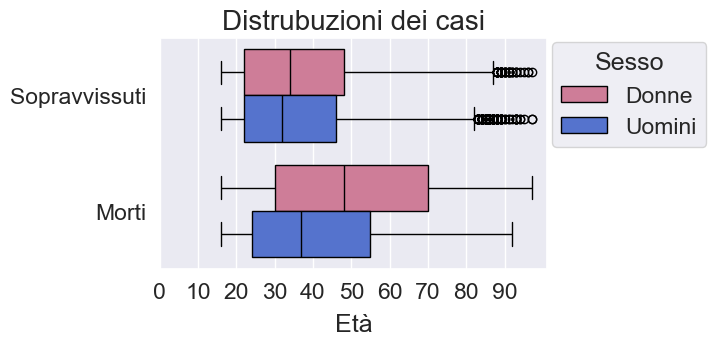

In [43]:
#Mortalità, sesso ed età

colori = {
    'Uomini' : 'royalblue',
    'Donne' : 'palevioletred'
}
plt.figure(figsize=(5, 3))
ax = sns.boxplot(data=df, y='sopravvissuto', x='ageOFocc', hue='sesso', palette=colori, linecolor='black')
plt.legend(title='Sesso', loc='upper right', bbox_to_anchor=(1.44, 1.03))
plt.title('Distrubuzioni dei casi', fontsize=20)
plt.ylabel('')
plt.xlabel('Età', labelpad=8)
plt.yticks(ticks=['Sopravvissuto', 'Morto'], labels=['Sopravvissuti', 'Morti'])
plt.xticks(ticks=range(0, 100, 10))
plt.show()

# Osservazioni:
#Mediane (l'età mediana aumenta nelle distrubuzioni dei casi di morte rispetto alla sopravvivenza, ma in particolare nel caso delle donne)
#Conclusioni: l'aumentare dell'età diminuisce le probabilità di sopravvivenza, inoltre le donne sono più vulnerabili all'aumentare dell'età

<h3>Il grafico mostra che all'aumentare dell'età abbiamo:</h3>
<ul>
    <li>Un aumento della mortalità di entrambi i sessi</li>
    <li>Una maggiore vulnerabilità delle <b class='donne'>donne<b></li>
</ul>

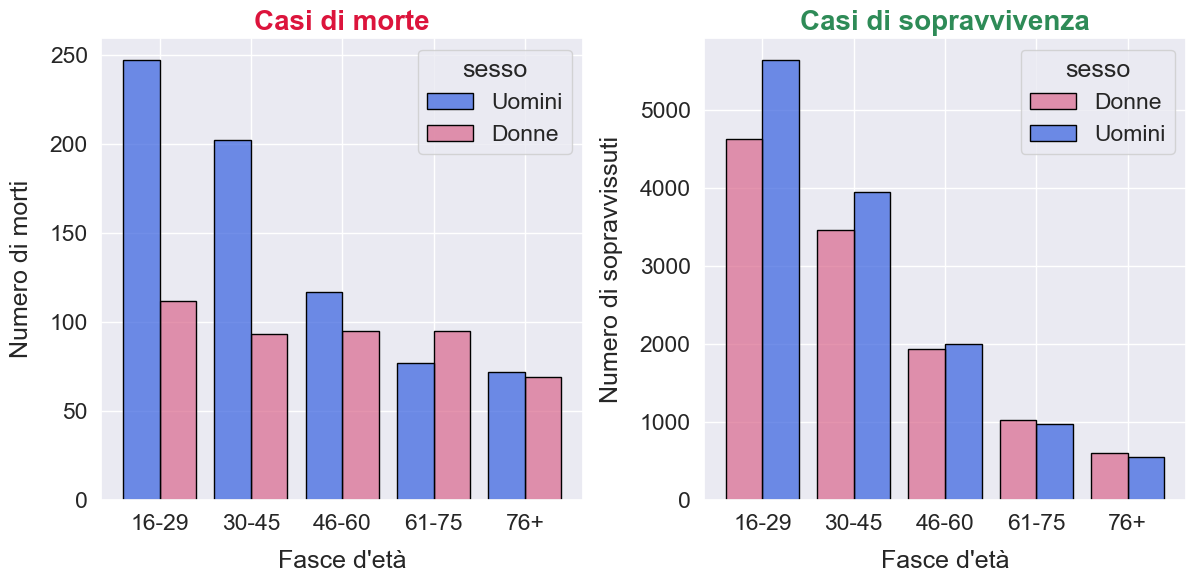

In [44]:
#Creazione fasce d'età

fasce = [15, 29, 45, 60, 75, 100]
nomi_fasce = ['16-29', '30-45', '46-60', '61-75', '76+']
df['fasce_età'] = pd.cut(df['ageOFocc'], bins=fasce, labels=nomi_fasce, right=False)

#Analisi mortalità divisa per fasce d'età

df_morti = df[df['sopravvissuto'] == 'Morto']

df_sopravvissuti = df[df['sopravvissuto'] == 'Sopravvissuto']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df_morti, x='fasce_età', hue='sesso', multiple='dodge', palette=colori, shrink=0.8, ax=ax1, edgecolor='black')
ax1.set_title('Casi di morte', color='crimson',  weight='bold', fontsize=20)
ax1.set_xlabel('Fasce d\'età', labelpad= 12)
ax1.set_ylabel('Numero di morti', labelpad= 12)

sns.histplot(data=df_sopravvissuti, x='fasce_età', hue='sesso', multiple='dodge', palette=colori, shrink=0.8, ax=ax2, edgecolor='black')
ax2.set_title('Casi di sopravvivenza', color='seagreen',  weight='bold', fontsize=20)
ax2.set_xlabel('Fasce d\'età', labelpad= 12)
ax2.set_ylabel('Numero di sopravvissuti', labelpad= 12)

plt.subplots_adjust(wspace=0.25)
plt.show()

In [45]:
df_percentuale = df_morti.groupby(['fasce_età', 'sesso']).size().reset_index(name='morti')

totale_casi_fascia_età = df.groupby(['fasce_età', 'sesso']).size().reset_index(name='totale_casi')

df_percentuale = df_percentuale.merge(totale_casi_fascia_età)

df_percentuale['percentuale'] = df_percentuale['morti'] / df_percentuale['totale_casi'] * 100

display(df_percentuale)

C:\Users\pieck\AppData\Local\Temp\ipykernel_18532\3395396519.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_percentuale = df_morti.groupby(['fasce_età', 'sesso']).size().reset_index(name='morti')
C:\Users\pieck\AppData\Local\Temp\ipykernel_18532\3395396519.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totale_casi_fascia_età = df.groupby(['fasce_età', 'sesso']).size().reset_index(name='totale_casi')


,fasce_età,sesso,morti,totale_casi,percentuale
0,16-29,Donne,112,4734,2.365864
1,16-29,Uomini,247,5880,4.200680
2,30-45,Donne,93,3552,2.618243
3,30-45,Uomini,202,4142,4.876871
4,46-60,Donne,95,2033,4.672897
5,46-60,Uomini,117,2119,5.521472
6,61-75,Donne,95,1123,8.459484
7,61-75,Uomini,77,1050,7.333333
8,76+,Donne,69,673,10.252600
9,76+,Uomini,72,622,11.575563


<h2>Dai dati emerge che per le fasce d'età analizzate:</h2>

<h3>I tassi di mortalità degli <b class='uomini'>uomini</b> sono...</h3>
<ul>
    <li>16-29 anni: <b>4.2%</b></li>
    <li>30-45 anni: <b>4.8%</b></li>
    <li>46-60 anni: <b>5.5%</b></li>
    <li>61-75 anni: <b>7.3%</b></li>
    <li>Oltre i 76 anni: <b>11.5%</b></li>
</ul>

<h3>I tassi di mortalità delle <b class='donne'>donne</b> sono...</h3>
<ul>
    <li>16-29 anni: <b>2.3%</b></li>
    <li>30-45 anni: <b>2.6%</b></li>
    <li>46-60 anni: <b>4.6%</b></li>
    <li>61-75 anni: <b>8.4%</b></li>
    <li>Oltre i 76 anni: <b>10.2%</b></li>
</ul>

<h2>In conclusione abbiamo:</h2>

<ul>
    <li><h3>Constatato l'importanza dell'uso della cintura di sicurezza con:</h3></li>
    <ul>
        <li><i>Diminuzione</i> del rischio di <b class='morte'>morte</b> di <b>3.3</b> volte</li>
        <li><i>Diminuzione</i> del rischio di <b class='perdita'>perdita di capacità fisica</b> di <b>1.7</b> volte</li>
        <li><i>Aumento</i> della probabilità di rimanere <b class='illesi'>illesi</b> di <b>2.3</b> volte</li>
    </ul>
</ul>

<ul>
    <li><h3>Osservato l'aumento della mortalità per sesso ed età</h3></li>
</ul>

<ul>
    <li><h3>Riscontrato che il tasso di mortalità è...</h3></li>
    <ul>
        <li><i>Tra i 16 e i 45 anni:</i> <b>1.8</b> volte maggiore per gli <b class='uomini'>uomini</b></li>
        <li><i>Tra i 46 e i 60 anni:</i> <b>1.2</b> volte maggiore per gli <b class='uomini'>uomini</b></li>
        <li><i>Tra i 61 e i 75 anni:</i> <b>1.1</b> volte maggiore per le <b class='donne'>donne</b></li>
        <li><i>Oltre i 76 anni:</i> <b>1.1</b> volte maggiore per gli <b class='uomini'>uomini</b></li>
    </ul>
</ul>

<h1 id='titolo'>Fine della presentazione</h1>
<br>
<p id='link'>Link a <b id='K'>Kaggle</b> per il dataset utilizzato:
    <br>
    <a href='https://www.kaggle.com/datasets/mexwell/influences-on-accident-fatalities'>https://www.kaggle.com/datasets/mexwell/influences-on-accident-fatalities</a></p>
    <br>
<p id='sub'>Grazie per l'attenzione</p>